# Recommender

Recommends based on current shop performance

In [121]:
import pandas as pd
import ast # to convert to strings to list
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from pytrends.request import TrendReq

In [122]:
transactions_df = pd.read_csv('../data/transactions.csv')
listings_df = pd.read_csv('../data/listings.csv')

# Good performing listings
lot of views and good conversions

# Under performing listings
lots of views BUT bad conversions
=> make better designs

# Over performing listings
little views BUT good conversions
=> make better tags, keywords, quality

# Bad performing listings
little views AND bad conversions
=> no action

# Best views tags
get average views for each tag / total number of views

# Best CTR tags
average ranking of 2 tags


<Axes: title={'center': 'Histogram of Views'}, ylabel='Frequency'>

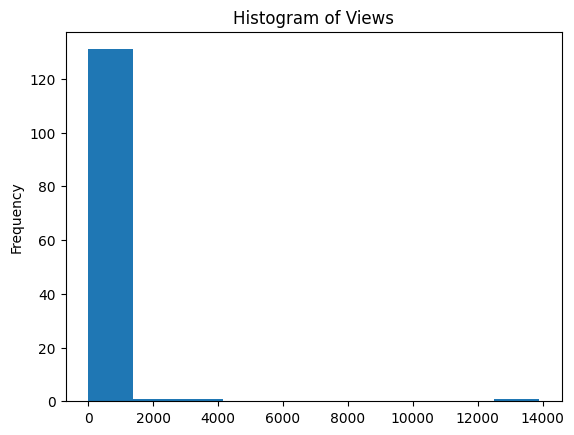

In [123]:
# Plot a histogram of the 'Views' column
listings_df.sort_values(by='views')['views'].plot(kind='hist', bins=10, title='Histogram of Views')

In [124]:
# Let's get the median number of views as a bench mark
views_25 = listings_df['views'].quantile(0.25)
views_50 = listings_df['views'].median()
views_75 = listings_df['views'].quantile(0.75)
print(views_25, views_50, views_75)

13.25 29.0 106.25


In [125]:
# Let's make a simpler df
listings_df['favorers over views'] = listings_df['num_favorers'] / listings_df['views']
listings2_df = listings_df[['title', 'views', 'num_favorers', 'favorers over views']]
listings2_df.sort_values(by='favorers over views', ascending=False, inplace=False).head(10)
# listings_df

,title,views,num_favorers,favorers over views
74,"Nuggs Not Drugs - Unhinged Shirt, Weirdcore sh...",3,4,1.333333
33,"Alcohol Abuser Funny Shirt | Whiskey Shirt, Wh...",5,3,0.600000
65,"I Love Me(n), Womens Funny T-shirts, Sarcastic...",6,3,0.500000
31,"Deadass Skeleton Shirt, Skeleton Shirt Oversiz...",2,1,0.500000
30,Did You Consult That Dog Within Meme Shirt | A...,8,3,0.375000
87,"Smile You&#39;re On Drugs Unisex Stoner Shirt,...",16,5,0.312500
114,"I take your fish, then I take your beach Unise...",8,2,0.250000
104,"Ok I Pull Up Capybara Shirt, Capybara Graphic ...",4,1,0.250000
70,"Zu Za Zaazu Emoji Mooning Unisex Shirt, Unhing...",8,2,0.250000
105,"Your Mom University Shirt, Mom Sweatshirt, Coo...",8,2,0.250000


In [126]:
# Good performing listings
# lot of views and good conversions
good_performing_df = listings2_df[listings2_df['views']>views_75].sort_values(by=['favorers over views'], ascending=False).head(10)
good_performing_df.head(10)

# Need to optimize price for if favorers. 

,title,views,num_favorers,favorers over views
94,"Minimum Wage, Maximum Rage Funny Skeleton Meme...",139,32,0.230216
14,i suffer from mental illinois Depressed Cat Ts...,228,32,0.140351
46,"She King on My Gizzard - Unhinged Shirt, Weird...",362,49,0.135359
39,Vintage 90s I Got That Dog In Me Unisex T-Shir...,164,22,0.134146
35,"Born to Dilly Dally, Forced to Lock In, Sad Ca...",121,16,0.132231
5,"Rippit - Funny Unisex Stoner T-Shirt, Frog Swe...",963,124,0.128764
2,"Autism Vintage T-Shirt, Retro Metal Shirt, Fun...",1554,199,0.128057
16,"War Cat in the Battlefield Unisex Shirt, Kitte...",668,84,0.125749
3,"They Don&#39;t Understand Alpha Wolf Shirt, Un...",608,70,0.115132
98,No Need To Get Aggressive Raccoon Shirt - Funn...,166,19,0.114458


In [127]:
# Under performing listings
# lots of views BUT bad conversions
# => make better designs
under_performing_df = listings2_df[listings2_df['views']>views_75].sort_values(by=['favorers over views'], ascending=True).head(10)
under_performing_df.head(10)

,title,views,num_favorers,favorers over views
43,"Fight or Flxight, Cute Penguin Shirt, Penguin ...",129,2,0.015504
76,"My Brain is Lacking, But My Ass is Packing, Fu...",175,3,0.017143
60,"Hoy Triste Cat Shirt - Latina Shirt, Funny Spa...",450,13,0.028889
55,"Fight or Flxight, Cute Penguin Sweatshirt, Kaw...",358,11,0.030726
95,"Fat Cat Unisex Sweater, Fat Cat, Chonky Cat, C...",159,5,0.031447
51,"Diabetes Conqueror Unisex Ironic Funny Shirt, ...",166,7,0.042169
45,"Yellowstone National Park Unisex Sweatshirt, C...",274,12,0.043796
4,"Capybara Bootleg Edit Unisex Shirt, Cute Capyb...",290,16,0.055172
12,Feminism Sigma Donkey Shirt - Funny Meme Shirt...,3452,193,0.055910
6,"Existence is Pain Au Chocolat, Life is Pain Au...",214,13,0.060748


In [128]:
# Over performing listings
# little views BUT lots of favorites
# => make better tags, keywords, quality
over_performing_df = listings2_df[listings2_df['views']<views_25].sort_values(by=['favorers over views'], ascending=False).head(10)
over_performing_df.head(10)

,title,views,num_favorers,favorers over views
74,"Nuggs Not Drugs - Unhinged Shirt, Weirdcore sh...",3,4,1.333333
33,"Alcohol Abuser Funny Shirt | Whiskey Shirt, Wh...",5,3,0.600000
31,"Deadass Skeleton Shirt, Skeleton Shirt Oversiz...",2,1,0.500000
65,"I Love Me(n), Womens Funny T-shirts, Sarcastic...",6,3,0.500000
30,Did You Consult That Dog Within Meme Shirt | A...,8,3,0.375000
105,"Your Mom University Shirt, Mom Sweatshirt, Coo...",8,2,0.250000
70,"Zu Za Zaazu Emoji Mooning Unisex Shirt, Unhing...",8,2,0.250000
114,"I take your fish, then I take your beach Unise...",8,2,0.250000
104,"Ok I Pull Up Capybara Shirt, Capybara Graphic ...",4,1,0.250000
28,"Feminism Gorilla T-Shirt | Funny Meme Shirt, F...",5,1,0.200000


In [129]:
# Bad performing listings
# little views AND bad conversions
# => no action
bad_performing_df = listings2_df[listings2_df['views']<views_25].sort_values(by=['favorers over views'], ascending=True).head(10)
bad_performing_df.head(10)

,title,views,num_favorers,favorers over views
20,Acoustic Genius Sloth Shirt | Autism Cute Shirt,1,0,0.0
117,"Professional Catfisher T-Shirt, Cursed Fishing...",12,0,0.0
111,"Capy Valentines Day, Capybara Shirt, Capybara ...",13,0,0.0
109,"Professional Catfisher Sweater, Cute Fishing S...",9,0,0.0
108,"I&#39;m gonna eat you, Funny Shirt, Meme Sweat...",4,0,0.0
100,"Let&#39;s Get This Bread- Baker T-shirt, Cozy ...",12,0,0.0
99,"Ok I Pull Up Capybara Shirt, Capybara Graphic ...",4,0,0.0
97,"I Choo Choo Choose You Unisex Shirt, Cute Trai...",10,0,0.0
71,"Be Gay, Do Crime Unisex Sweatshirt, Funny Gay ...",1,0,0.0
68,"Be Gay Do Crime Unisex Shirt, Funny Y2K Gay Sh...",7,0,0.0


In [130]:
def get_best_tags(metric, listings_df):
    """
    Calculate the performance of tags based on the given metric.
    
    Args:
        metric (str): The column name representing the metric (e.g., 'views', 'favorers').
        listings_df (pd.DataFrame): DataFrame containing the listings data. 
                                    Must include 'tags' column (list-like) and the metric column.

    Returns:
        pd.DataFrame: DataFrame with tags and their average performance score.
    """
    # Ensure 'tags' column is properly formatted as lists
    listings_df['tags'] = listings_df['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    # Explode the 'tags' column to simplify processing
    exploded_df = listings_df.explode('tags')
    
    # Group by tag and calculate metrics
    tag_group = exploded_df.groupby('tags')[metric].agg(['sum', 'count'])
    tag_group['average_score'] = tag_group['sum'] / tag_group['count']
    
    # Sort tags by their performance scores
    sorted_tags = tag_group[['average_score']].sort_values(by='average_score', ascending=False).reset_index()
    
    return sorted_tags.rename(columns={'tags': 'Tag', 'average_score': 'Score'})

# Example usage:
# result = get_best_tags('views', listings_df)


In [131]:
best_views_tags_df = get_best_tags('views', listings_df)
best_favorers_tags_df = get_best_tags('num_favorers', listings_df)

In [ ]:
median_view_score = best_views_tags_df['Score'].median()
median_view_score

32.0

In [133]:
best_views_tags_df.head(10)

,Tag,Score
0,Gifts For Friends,13888.000000
1,Funny Ironic Tshirt,13888.000000
2,Cursed,7600.000000
3,Stupid Shirt,7278.000000
4,Funny Meme Shirt,7125.000000
5,Cursed Shirt,5187.333333
6,Weirdcore Shirt,4972.666667
7,Gen Z Meme,4972.666667
8,Inappropriate Shirt,4757.000000
9,Unhinge Shirt,3804.750000


In [134]:
best_favorers_tags_df.head()

,Tag,Score
0,Gifts For Friends,1244.0
1,Funny Ironic Tshirt,1244.0
2,Cursed,685.0
3,Stupid Shirt,664.0
4,Funny Meme Shirt,646.5


Additional things to do.
1. Make a combined favorers and views metric to get a holistic view
2. Try to find a way to get click through rate. 

What tags to change in the worst listings?
1. Go through the over the bad performing listings
2. See which tags are the worst
3. Give recommendations on what tags to change to what

In [135]:
# 1. Go through the bad performing listings
bad_performing_df = listings_df[listings_df['views']<views_25].sort_values(by=['favorers over views'], ascending=True).reset_index(drop=True).head(10)
over_performing_df = listings_df[listings_df['views']<views_25].sort_values(by=['favorers over views'], ascending=False).reset_index(drop=True).head(10)


In [136]:
# Convert to dictionary
best_views_tags = best_views_tags_df.set_index('Tag')['Score'].to_dict()
best_views_tags_list = list(best_views_tags.keys())[:50]
print(best_views_tags_list)

['Gifts For Friends', 'Funny Ironic Tshirt', 'Cursed', 'Stupid Shirt', 'Funny Meme Shirt', 'Cursed Shirt', 'Weirdcore Shirt', 'Gen Z Meme', 'Inappropriate Shirt', 'Unhinge Shirt', 'donkey shirt', 'Weird Shirt', 'Unhinged Shirt', 'animal meme shirt', 'meme animal shirt', 'ironic tshirt', 'tiktok meme', 'autism funny shirt', 'autism tshirt', 'cursed tshirt', 'metallica shirt', 'Autism on Fire Shirt', 'Skeleton Fire Shirt', 'Skeleton Autism Tee', 'Shirt that Go Hard', 'feminism shirt', 'feminist shirt', 'alpha male shirt', "women's rights funny", 'gift for sister', 'gift for brother', 'weirdcore', 'Stoned Frog Shirt', 'Rippit Shirt', 'Stoner Shirt', '420 TShirt', 'crying cat', 'apple cat', 'apple cat meme', 'cute kitten shirt', 'shrek shirt', 'meme tshirt', 'meme cat shirt', 'gift for him', 'Kitten Solider Shirt', 'Cat Lover Gift', 'Military Cat Shirt', 'Funny Cat Meme', 'Army Shirt', 'War Cat Shirt']


In [137]:
def change_tags(list_of_tags, fifty_best_tags, model_name='all-MiniLM-L6-v2'):
    """
    Changes the first 3 values of the list of tags to better ones.
    3 replacements are selected from the 50 best performing tags currently 
    based on semantic similarity using embeddings.
    
    Input:
    list_of_tags - entire list of tags for a listing assuming the tags are already ordered
    fifty_best_tags - list of the best tags currently (order doesn't matter)
    model_name - pre-trained SentenceTransformer model to use for embeddings

    Output:
    modified_tags - modified list of tags
    """
    # Load the pre-trained model
    model = SentenceTransformer(model_name)
    
    # Generate embeddings for tags
    current_tag_embeddings = model.encode(list_of_tags[:3])  # Only first 3 tags
    best_tag_embeddings = model.encode(fifty_best_tags)

    # Compute cosine similarity and find the best matches
    def find_related_tags(current_embeddings, best_embeddings, best_tags, num_replacements=3):
        """
        Find the most semantically similar tags from the best tags.
        """
        related_tags = []
        for current_embedding in current_embeddings:
            # Compute similarities with all best tags
            similarities = cosine_similarity([current_embedding], best_embeddings)[0]
            
            # Find the index of the best match
            best_index = np.argmax(similarities)
            related_tags.append(best_tags[best_index])
            
            # Remove the selected tag and its embedding to prevent reuse
            best_tags.pop(best_index)
            best_embeddings = np.delete(best_embeddings, best_index, axis=0)
            
            if len(related_tags) >= num_replacements:
                break
        return related_tags

    replacement_tags = find_related_tags(current_tag_embeddings, best_tag_embeddings, fifty_best_tags)
    
    # Replace the first 3 tags with the most related ones
    modified_tags = replacement_tags + list_of_tags[3:]

    return modified_tags

# Example usage:
list_of_tags = ["nature", "landscape", "photography", "sunset", "travel"]
fifty_best_tags = ["natural beauty", "scenic view", "photo art", "sunset photography", "travel adventures", "wildlife", "hiking trails"]

modified_tags = change_tags(list_of_tags, fifty_best_tags)
print(modified_tags)


['wildlife', 'scenic view', 'photo art', 'sunset', 'travel']


In [141]:
bad_performing_df['tags']

0    [Autism Shirt, Autistic Shirt, Funny Autism Sh...
1    [catfish shirt, fishing shirt funny, funny fis...
2    [Capy Valentines, Capybara Shirt, Capybara T S...
3    [cute fishing shirt, fishing shirt women, fish...
4    [Sweatshirt, sweatshirt funny, women sweatshir...
5    [baker gift, bread making gift, dog and baking...
6    [capybara shirt, funny capybara shirt, capybar...
7    [gift for girlfriend, i choo choo, choo choo c...
8    [weirdcore shirt, funny meme shirt, gender neu...
9    [be gay do crime, funny gay shirt, lesbian shi...
Name: tags, dtype: object

In [142]:
from pytrends.request import TrendReq
import random

def replace_bad_tags_with_trends(listings, tag_scores, threshold, geo='US'):
    """
    Replace bad-performing tags in Etsy listings using Google Trends.

    Args:
        listings (list of dict): List of listings, each containing a 'tags' key with a list of tags.
        tag_scores (dict): A dictionary of tag scores {tag: score}.
        threshold (float): Threshold below which a tag is considered bad-performing.
        geo (str): Geographic location for Google Trends (default: 'US').

    Returns:
        list of dict: Updated listings with bad tags replaced using Google Trends.
    """
    pytrends = TrendReq(hl='en-US', tz=360)
    updated_listings = []

    for listing in listings:
        tags = listing.get('tags', [])
        updated_tags = []
        
        for tag in tags:
            if tag_scores.get(tag, 0) < threshold:
                try:
                    # Fetch related trending keywords from Google Trends
                    pytrends.build_payload([tag], cat=0, timeframe='today 3-m', geo=geo, gprop='')
                    related_queries = pytrends.related_queries()
                    top_queries = related_queries[tag]['top'] if related_queries[tag] else None
                    
                    if top_queries is not None:
                        # Select a trending keyword as a replacement
                        trending_tags = top_queries['query'].tolist()
                        new_tag = random.choice(trending_tags) if trending_tags else tag
                        updated_tags.append(new_tag)
                    else:
                        # If no trending tags are found, keep the original tag
                        updated_tags.append(tag)
                except Exception as e:
                    print(f"Error fetching trends for tag '{tag}': {e}")
                    updated_tags.append(tag)
            else:
                updated_tags.append(tag)
        
        # Ensure no duplicate tags
        updated_tags = list(set(updated_tags))
        
        # Update the listing with new tags
        updated_listing = listing.copy()
        updated_listing['tags'] = updated_tags
        updated_listings.append(updated_listing)

    return updated_listings


In [143]:
# Sample data
listings = [
    {"title": "T-Shirt 1", "tags": ["funny", "humor", "cool"]},
    {"title": "T-Shirt 2", "tags": ["cute", "gift", "holiday"]},
]

# Tag performance scores
tag_scores = {"funny": 10, "humor": 5, "cool": 3, "cute": 8, "gift": 12, "holiday": 2}

# Threshold for bad performance
threshold = 5

# Replace bad tags with Google Trends
updated_listings = replace_bad_tags_with_trends(listings, tag_scores, threshold, geo='US')

# Output the updated listings
for listing in updated_listings:
    print(listing)


Error fetching trends for tag 'cool': list index out of range
Error fetching trends for tag 'holiday': list index out of range
{'title': 'T-Shirt 1', 'tags': ['cool', 'funny', 'humor']}
{'title': 'T-Shirt 2', 'tags': ['gift', 'cute', 'holiday']}


In [ ]:
# 2. See which tags are the worst
def change_all_tags(df):
    for row in range(df.shape[0]):
        tag_dict = {}
        for tag in df['tags'][row]:
            # Get the tag scores for each tag into a dictionary
            tag_dict[tag] = best_views_tags[tag]
        
        # Print the listing
        print(df['title'][row][:10])

        # Sort the dictionary to get the worst 
        sorted_tag_dict = dict(sorted(tag_dict.items(), key=lambda item: item[1]))
        print(sorted_tag_dict)

        # Change the tags to better ones
        new_tags = change_tags(df['tags'][row], best_views_tags_list)
        print('previous', df['tags'][row])
        print('new', new_tags)
    return df


In [ ]:
modified_bad_performing_df = change_all_tags(bad_performing_df)

Acoustic G
{'sloth shirt': 1.0, 'racoons tshirt': 1.0, 'cute and trashy': 1.0, 'acoustic genius': 1.0, 'dilly dally shirts': 1.0, 'old school cult shop': 1.0, 'Autism Shirt': 656.5, 'Autistic Shirt': 656.5, 'Funny Autism Shirt': 656.5, 'Autism Gift': 656.5, 'Unhinged Shirt': 2708.1666666666665, 'Weird Shirt': 3246.2, 'Unhinge Shirt': 3804.75}
sloth shirt
racoons tshirt
cute and trashy
previous ['Autism Shirt', 'Autistic Shirt', 'Funny Autism Shirt', 'Unhinged Shirt', 'Unhinge Shirt', 'Weird Shirt', 'Autism Gift', 'sloth shirt', 'racoons tshirt', 'cute and trashy', 'acoustic genius', 'dilly dally shirts', 'old school cult shop']
new ['autism funny shirt', 'autism tshirt', 'Autism on Fire Shirt', 'Unhinged Shirt', 'Unhinge Shirt', 'Weird Shirt', 'Autism Gift', 'sloth shirt', 'racoons tshirt', 'cute and trashy', 'acoustic genius', 'dilly dally shirts', 'old school cult shop']
Profession
{'catfish shirt': 10.5, 'fishing shirt funny': 10.5, 'adult funny shirt': 10.5, 'funny fishing gifts': 

## Another part
currently the listings don't have the number of shirts sold per. Is there a way to add that in? 

1. listings_df left join to 